In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import os, sys
import re

In [2]:
#Setting the current working directory
os.chdir('C:\\Users\\DEll\\OneDrive\\Documents\\ML Projects\\Book Recommendation System')

In [3]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false;
function code_toggle_err() {
if (code_show_err){
$('div.output_stderr').hide();
}
else{
$('div.output_stderr').show();
}
code_show_err = !=code_show_err
}
$( document ).ready(code_toggle_err);
</script>
To toggle on/of output_stderr, click <a herf="javascript:code_toggle_err()">here</a>''')

In [4]:
#Loading data
books = pd.read_csv(r'C:\Users\DEll\OneDrive\Documents\ML Projects\Book Recommendation System\Dataset\Books.csv\Books.csv', sep=',', error_bad_lines=False, encoding="latin-1")
books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [5]:
books.shape

(271360, 8)

In [6]:
users = pd.read_csv(r'C:\Users\DEll\OneDrive\Documents\ML Projects\Book Recommendation System\Dataset\Users.csv\Users.csv', sep=',', error_bad_lines=False, encoding='latin-1')
users[['User-ID', 'Location', 'Age']]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [7]:
users.shape

(278858, 3)

In [8]:
ratings = pd.read_csv(r'C:\Users\DEll\OneDrive\Documents\ML Projects\Book Recommendation System\Dataset\Ratings.csv\Ratings.csv', sep=',', error_bad_lines=False, encoding='latin-1')
ratings[['User-ID', 'ISBN', 'Book-Rating']]

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [9]:
ratings.shape

(1149780, 3)

In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [11]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [12]:
#to display full text in columns
pd.set_option('display.max_colwidth', -1)

In [13]:
books = books.rename(columns={'Year-Of-Publication': 'YearOfPublication'})
books = books.rename(columns={'Book-Title': 'BookTitle'})
books = books.rename(columns={'Book-Author': 'BookAuthor'})
books = books.rename(columns={'Image-URL-S': 'ImageURLS'})
books = books.rename(columns={'Image-URL-M': 'ImageURLM'})
books = books.rename(columns={'Image-URL-L': 'ImageURLL'})

In [14]:
books.dtypes

ISBN                 object
BookTitle            object
BookAuthor           object
YearOfPublication    object
Publisher            object
ImageURLS            object
ImageURLM            object
ImageURLL            object
dtype: object

In [15]:
#Checking for unique values of YearOfPublication
books.YearOfPublication.unique()
#This object should have only integers in it but as it can be seen in the output, YearOfPublication also contains
#strings which have been incorrectly loaded to it. For example: 'DK Publishing Inc' and 'Gallimard'.

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [16]:
#investigating the rows having 'Gallimard' as YearOfPublication
books.loc[books.YearOfPublication == 'Gallimard',:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?ÃÂ©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [17]:
#making required corrections
books.loc[books.ISBN == '2070426769', 'YearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769', 'BookAuthor'] = "Jean-Marie Gustave Le ClÃ?ÃÂ©zio"
books.loc[books.ISBN == '2070426769', 'Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769', 'BookTitle'] = "Peuple du ciel, suivi de 'Les Bergers"
books.loc[books.ISBN == '2070426769', 'ImageURLS'] = "http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg"
books.loc[books.ISBN == '2070426769', 'ImageURLM'] = "http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg"
books.loc[books.ISBN == '2070426769', 'ImageURLL'] = "http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg"

In [18]:
#rechecking
books.loc[books.ISBN == '2070426769',:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?ÃÂ©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg


In [19]:
#investigating the rows having 'DK Publishing Inc' as YearOfPublication
books.loc[books.YearOfPublication == 'DK Publishing Inc',:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [20]:
#for ISBN '078946697X'
books.loc[books.ISBN == '078946697X', 'YearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X', 'BookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X', 'Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X', 'BookTitle'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
books.loc[books.ISBN == '078946697X', 'ImageURLS'] = "http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg"
books.loc[books.ISBN == '078946697X', 'ImageURLM'] = "http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg"
books.loc[books.ISBN == '078946697X', 'ImageURLL'] = "http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg"

In [21]:
#for ISBN '789466953'
books.loc[books.ISBN == '789466953', 'YearOfPublication'] = 2000
books.loc[books.ISBN == '789466953', 'BookAuthor'] = "James Buckley"
books.loc[books.ISBN == '789466953', 'Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '789466953', 'BookTitle'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
books.loc[books.ISBN == '789466953', 'ImageURLS'] = "http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg"
books.loc[books.ISBN == '789466953', 'ImageURLM'] = "http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg"
books.loc[books.ISBN == '789466953', 'ImageURLL'] = "http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg"

In [22]:
#rechecking
books.loc[(books.ISBN == '078946697X') | (books.ISBN == '789466953'), :]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
221678,789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg


In [23]:
#Correcting the dtypes of YearOfPublication
books.YearOfPublication = pd.to_numeric(books.YearOfPublication, errors = 'coerce')

In [24]:
print(sorted(books['YearOfPublication'].unique()))
#Now, YearOfPublication contains all integer values in it.

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [25]:
#Here, the value 0 is invalid and as this dataset was published in 2004, assuming the years after
#2005 invalid keeping some margin in case dataset was updated thereafter.
#Setting invalid years as NaN
books.loc[(books.YearOfPublication > 2005) | (books.YearOfPublication == 0), 'YearOfPublication'] = np.NAN

In [26]:
#replacing NaNs with mean value of YearOfPublication
books.YearOfPublication.fillna(round(books.YearOfPublication.mean()), inplace=True)

In [27]:
#rechecking
books.YearOfPublication.isnull().sum()
#No NaNs exist

0

In [28]:
#resetting the dtype as int32
books.YearOfPublication = books.YearOfPublication.astype(np.int32)

In [29]:
#exploring 'Publisher' column
#investigating rows having NaNs
books.loc[books.Publisher.isnull(),:]
#two NaNs

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [30]:
#Checking rows having BookTitle as Tyrant Moon to see if we can get any clues
books.loc[(books.BookTitle == 'Tyrant Moon'),:]
#No clue

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg


In [31]:
#Checking rows having BookTitle as Finders Keepers to see if we can get any clue
books.loc[(books.BookTitle == 'Finders Keepers'),:]
#output shows all rows with BookTitle Finders Keepers but having different Publisher and BookAuthor

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
10799,082177364X,Finders Keepers,Fern Michaels,2002,Zebra Books,http://images.amazon.com/images/P/082177364X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/082177364X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/082177364X.01.LZZZZZZZ.jpg
42019,70465037,Finders Keepers,Barbara Nickolae,1989,McGraw-Hill Companies,http://images.amazon.com/images/P/0070465037.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0070465037.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0070465037.01.LZZZZZZZ.jpg
58264,688118461,Finders Keepers,Emily Rodda,1993,Harpercollins Juvenile Books,http://images.amazon.com/images/P/0688118461.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0688118461.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0688118461.01.LZZZZZZZ.jpg
66678,1575663236,Finders Keepers,Fern Michaels,1998,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575663236.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1575663236.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1575663236.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg
134309,156309505,Finders Keepers,Will,1989,Voyager Books,http://images.amazon.com/images/P/0156309505.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0156309505.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0156309505.01.LZZZZZZZ.jpg
173473,973146907,Finders Keepers,Sean M. Costello,2002,Red Tower Publications,http://images.amazon.com/images/P/0973146907.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0973146907.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0973146907.01.LZZZZZZZ.jpg
195885,61083909,Finders Keepers,Sharon Sala,2003,HarperTorch,http://images.amazon.com/images/P/0061083909.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0061083909.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0061083909.01.LZZZZZZZ.jpg
211874,373261160,Finders Keepers,Elizabeth Travis,1993,Worldwide Library,http://images.amazon.com/images/P/0373261160.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0373261160.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0373261160.01.LZZZZZZZ.jpg


In [32]:
#Checking by BookAuthor to find patterns
books.loc[(books.BookAuthor == 'Elaine Corvidae'),:]
#all having different Publisher
#No clue found

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
126762,1931696934,Winter's Orphans,Elaine Corvidae,2001,Novelbooks,http://images.amazon.com/images/P/1931696934.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696934.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696934.01.LZZZZZZZ.jpg
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129001,759901880,Wolfkin,Elaine Corvidae,2001,Hard Shell Word Factory,http://images.amazon.com/images/P/0759901880.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0759901880.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0759901880.01.LZZZZZZZ.jpg


In [33]:
#Checking by BookAuthor to find patterns
books.loc[(books.BookAuthor == 'Linnea Sinclair'),:]

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [34]:
#Since we found no clue to find the Publisher for NaNs, we replace NaNs with 'other'
books.loc[(books.ISBN == '1931696993'),'Publisher'] = 'Other'
books.loc[(books.ISBN == '193169656X'),'Publisher'] = 'Other'

In [35]:
users.shape

(278858, 3)

In [36]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [37]:
users.dtypes

User-ID     int64  
Location    object 
Age         float64
dtype: object

In [38]:
users = users.rename(columns={'User-ID': 'UserID'})

In [39]:
users.UserID.values

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [40]:
sorted(users.Age.unique())
#Age has some invalid entries like NaN, 0 and other very small values and very high values like 100 and above

[nan,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 113.0,
 114.0,
 115.0,
 116.0,
 118.0,
 119.0,
 123.0,
 124.0,
 127.0,
 128.0,
 132.0,
 133.0,
 136.0,
 137.0,
 138.0,
 140.0,
 141.0,
 143.0,
 146.0,
 147.0,
 148.0,
 151.0,
 152.0,
 156.0,
 157.0,
 159.0,


In [41]:
#Replacing very small values(below 5) and very high values(above 95) with NaN
users.loc[(users.Age  > 95) | (users.Age < 5), 'Age'] = np.NAN

In [42]:
#replacing NaN with mean
users.Age = users.Age.fillna(users.Age.mean())

In [43]:
#setting the dtype as int32
users.Age = users.Age.astype(np.int32)

In [44]:
#rechecking
sorted(users.Age.unique())

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95]

In [45]:
#rechecking shape
ratings.shape

(1149780, 3)

In [46]:
#ratings dataset will have n_users*n_books entries if every user rated every item, this shows that dataset is very sparse
n_users = users.shape[0]

In [47]:
n_books = books.shape[0]

In [48]:
print(n_users*n_books)

75670906880


In [49]:
#checking first 5 rows
ratings.head(5)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [50]:
#changing column names
ratings = ratings.rename(columns={'User-ID':'UserID'})
ratings = ratings.rename(columns={'Book-Rating':'BookRating'})

In [51]:
ratings.BookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [52]:
#Ratings dataset should have books only which exist in our Books dataset, unless new data was added to it. 
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [53]:
ratings.shape

(1149780, 3)

In [54]:
ratings_new.shape
#It can be seen that rows containing ISBN which wasn't a part of Books dataset were dropped.

(196829, 3)

In [55]:
print("Number of users: " + str(n_users))
print("Number of books: " + str(n_books))

Number of users: 278858
Number of books: 271360


In [56]:
#Sparsity of dataset in percentage
sparsity = 1.0 - len(ratings_new)/float(n_users*n_books)
print("The sparsity level of Book Crossing dataset: " + str(sparsity*100) + "%")

The sparsity level of Book Crossing dataset: 99.99973988814445%


In [57]:
#Ratings contains the book rating information. Ratings are either explicit, expressed on the scale of 1-10
#higher values denoting higher appreciation, or implicit, denoted by 0.
ratings.BookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [58]:
#Segregating implicit and explicit Ratings dataset
ratings_implicit = ratings_new[ratings_new.BookRating == 0]
ratings_explicit = ratings_new[ratings_new.BookRating  != 0]

In [59]:
ratings_new.shape

(196829, 3)

In [60]:
ratings_explicit.shape

(80804, 3)

In [61]:
ratings_implicit.shape

(116025, 3)

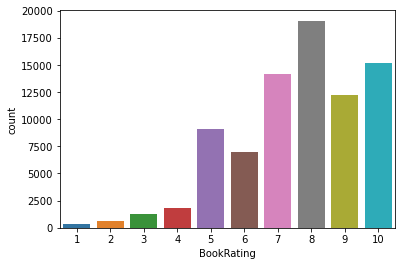

In [62]:
#Plotting count of BookRating
sns.countplot(data = ratings_explicit, x = 'BookRating')
plt.show()
#It can be seen that higher ratings are more common amongst users and rating 8 has been rated highest number of times.

In [63]:
#Simple Popularity Based Recommendation System
#Now, a simple popularity based recommendation system can be built based on count of user ratings of different books.
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['BookRating'].sum())
top10 = ratings_count.sort_values('BookRating', ascending = False).head(10)
print('The following books are recommended: ')
top10.merge(books, left_index = True, right_on = 'ISBN')

#Given below are top 10 recommendations based on popularity. It is evident that books authored by J.K. Rowling are the most popular.

The following books are recommended: 


,BookRating,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg
305,2062,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.LZZZZZZZ.jpg
1922,1999,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.LZZZZZZZ.jpg
5506,1861,043935806X,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/043935806X.01.LZZZZZZZ.jpg
456,1627,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,http://images.amazon.com/images/P/044021145X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044021145X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044021145X.01.LZZZZZZZ.jpg
1406,1473,1400034779,The No. 1 Ladies' Detective Agency (Today Show Book Club #8),Alexander McCall Smith,2003,Anchor,http://images.amazon.com/images/P/1400034779.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1400034779.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1400034779.01.LZZZZZZZ.jpg
4180,1141,044651652X,The Bridges of Madison County,Robert James Waller,1992,Warner Books,http://images.amazon.com/images/P/044651652X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044651652X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044651652X.01.LZZZZZZZ.jpg
3234,1072,1558743669,"A Child Called \It\"": One Child's Courage to Survive""",Dave Pelzer,1995,Health Communications,http://images.amazon.com/images/P/1558743669.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1558743669.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1558743669.01.LZZZZZZZ.jpg
1012,1026,044022165X,The Rainmaker,JOHN GRISHAM,1996,Dell,http://images.amazon.com/images/P/044022165X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044022165X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044022165X.01.LZZZZZZZ.jpg
5070,1013,014028009X,Bridget Jones's Diary,Helen Fielding,1999,Penguin Books,http://images.amazon.com/images/P/014028009X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014028009X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014028009X.01.LZZZZZZZ.jpg


In [64]:
#Similarly segregating users who have given explicit ratings and those who gave implicit ratings.
users_exp_ratings = users[users.UserID.isin(ratings_explicit.UserID)]
users_imp_ratings = users[users.UserID.isin(ratings_implicit.UserID)]

In [65]:
users.shape

(278858, 3)

In [66]:
users_exp_ratings.shape

(26855, 3)

In [67]:
users_imp_ratings.shape

(21723, 3)

In [68]:
#Collaborative Filttering Based Recommendationn System
#Considering users who have rated atleast 100 books and nooks who have atleast 100 ratings
counts1 = ratings_explicit['UserID'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['UserID'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['BookRating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['BookRating'].isin(counts[counts >= 100].index)]

In [69]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = ratings_explicit.pivot(index = 'UserID', columns = 'ISBN', values = 'BookRating')
UserID = ratings_matrix.index
ISBN = ratings_matrix.columns
ratings_matrix.shape

(30, 6419)

In [70]:
ratings_matrix.head()
#Note that most values are NaN(undefined) implying absence of ratings

ISBN,000104687X,000225056X,000225929X,000433549X,000611962X,000648302X,000649840X,000710331X,000710698X,002011690X,...,999058284X,9992003766,9997406990,9997409728,9997411757,9997507002,999750805X,9997519086,9997555635,B0000DYXID
UserID,,,,,,,,,,,,,,,,,,,,,
8890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11676,NaN,NaN,10.0,NaN,NaN,8.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
16795,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23902,6.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,7.0,8.0,7.0,NaN,6.0,5.0,8.0,NaN
33145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
n_users = ratings_matrix.shape[0] #considering on those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
n_users

30

In [72]:
n_books

6419

In [73]:
#since NaNs cannot be handled by training algorithms, replacing these by 0, which indicates absence of ratings
#setting data type
ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

In [74]:
#checking first few rows
ratings_matrix.head(5)

ISBN,000104687X,000225056X,000225929X,000433549X,000611962X,000648302X,000649840X,000710331X,000710698X,002011690X,...,999058284X,9992003766,9997406990,9997409728,9997411757,9997507002,999750805X,9997519086,9997555635,B0000DYXID
UserID,,,,,,,,,,,,,,,,,,,,,
8890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11676,0,0,10,0,0,8,8,0,0,0,...,0,0,0,0,0,0,0,0,0,10
16795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23902,6,0,0,0,7,0,0,0,0,0,...,0,5,7,8,7,0,6,5,8,0
33145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
#rechecking the sparsity
sparsity = 1.0 - len(ratings_explicit)/float(users_exp_ratings.shape[0]*n_books)
print('The sparsity level of Book Crossing dataset: ' + str(sparsity*100) + '%')

The sparsity level of Book Crossing dataset: 99.99604135565122%


In [76]:
#Training our Recommendation System
#Setting global variables
global metric, k
k = 10
metric = 'cosine'

In [77]:
#User-based Recommendation System
#This function finds k similar users given the UserID and ratings_matrix
#These similarities are same as obtained via using pairwise_distances
def findsimilarusers(UserID, ratings, metric = metric, k=k):
    similarities = []
    indices = []
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(UserID)
    distance, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distance.flatten()
    
    return similarities, indices

In [78]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(UserID, ratings, metric = metric, k=k):
    prediction = 0
    user_loc = ratings.index.get_loc(UserID)
    similarities, indices = findsimilarusers(UserID, ratings, metric, k)#similar user based on cosine similarity
    mean_rating = ratings.iloc[user_loc, :].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities) - 1
    product = 1
    wtd_sum = 0
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else:
            ratings_diff = ratings.iloc[indices.flatten()[i]]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1
    elif prediction > 10:
        prediction = 10
    x = mean_rating + (wtd_sum/sum_wt)
    print('\nPredicted rating for user {0}: {1}'.format(UserID, prediction))
    
    return prediction

In [79]:
predict_userbased(11676, ratings_matrix);


Predicted rating for user 11676: 1


In [80]:
#Item-based Recommendation System
#This function finds k similar items given the UserID and rating
def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

In [81]:
#This function predicts the rating for specified user-item combination based on item-based approach
def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = int(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))    
    
    return prediction

In [82]:
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [83]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already
def recommendItem(user_id, ratings, metric=metric):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print ("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    else:    
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            clear_output(wait=True)
            prediction = []            
            if change['type'] == 'change' and change['name'] == 'value':            
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:                       
                    metric = 'cosine'   
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:                    
                                prediction.append(-1) #for already rated items
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print ("As per {0} approach....Following books are recommended..." .format(select.value))
                for i in range(len(recommended)):
                     print ("{0}. {1}".format(i+1,books.bookTitle[recommended.index[i]].encode('utf-8')))                       
        select.observe(on_change)
        display(select)

In [84]:
#checking for incorrect entries
recommendItem(999999,ratings_matrix)

User id should be a valid integer from this list :

   8890  11676  16795  23902  33145  35433  35859  39467  49144  56399
  63714  69078  76499  87141  93047  95902  98391 101851 132492 153662
 171118 172888 177458 189835 197659 217740 235105 241198 248718 261105 


In [85]:
recommendItem(4385, ratings_matrix)

User id should be a valid integer from this list :

   8890  11676  16795  23902  33145  35433  35859  39467  49144  56399
  63714  69078  76499  87141  93047  95902  98391 101851 132492 153662
 171118 172888 177458 189835 197659 217740 235105 241198 248718 261105 


In [86]:
recommendItem(2110, ratings_matrix)

User id should be a valid integer from this list :

   8890  11676  16795  23902  33145  35433  35859  39467  49144  56399
  63714  69078  76499  87141  93047  95902  98391 101851 132492 153662
 171118 172888 177458 189835 197659 217740 235105 241198 248718 261105 
